class of supervised algorithms for both classification and regression

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

* Naive Bayes -> Generative Model
* SVM -> Discriminative Model

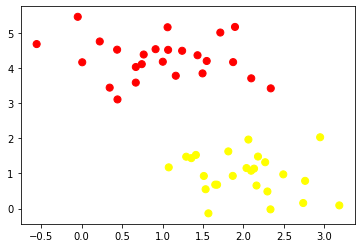

In [13]:
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='autumn')

## Maximizing the Margin

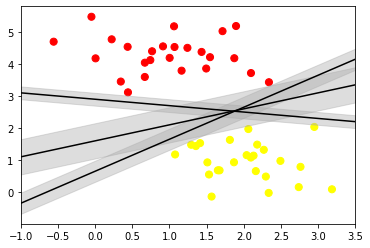

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

the line that maximizes this margin is the one we will choose as the optimal model

In [15]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x,y)

SVC(C=10000000000.0, kernel='linear')

#### run this to get decision boundaries

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [16]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit.

## Kernel SVM

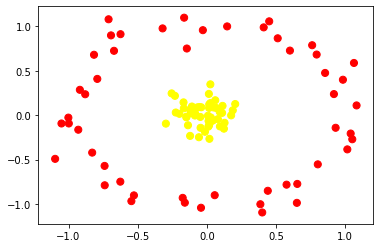

In [17]:
from sklearn.datasets.samples_generator import make_circles
x,y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(x,y)

plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='autumn')

In [18]:
r = np.exp(-(x**2)).sum(1) # radial basis function (RBF) centered on the middle clump

In [19]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(x, y)

SVC(C=1000000.0)

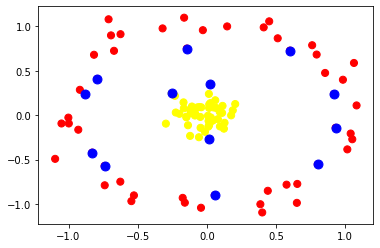

In [20]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, lw=1, facecolors='blue');

## Tuning the SVM: Softening Margins

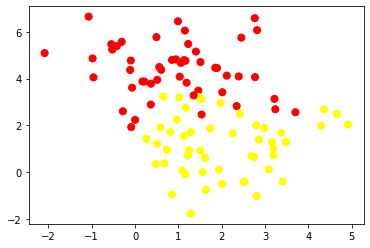

In [21]:
## Data with overlap

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

The optimal value of the C parameter will depend on your dataset, and should be tuned using cross-validation

## Pros

* Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
* Once the model is trained, the prediction phase is very fast.
* Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
* Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

## Cons

* The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
* The results do not have a direct probabilistic interpretation. 